# 앙상블 학습(Ensemble Learning)
- 여러 개의 분류기를 생성하고 예측을 결합하여 보다 정확한 최종 예측을 도출하는 기법
    - 보팅(Voting)
    - 배깅(Bagging)
    - 부스팅(Boosting)

## 배깅(Bagging)
- 부트스트랩(Bootstrap)을 집계(Aggregating)하여 학습 데이터가 충분하지 않더라도 충분한 학습효과를 주어 높은 bias의 underfitting 문제나, 높은 variance로 인한 overfitting 문제를 해결하는데 도움을 준다

    - 부트스트랩(Bootstrap): 데이터 세트를 충첩되게 분할하는 것
        - sub set의 데이터 수는 전체 데이터 수와 동일

## 랜덤 포레스트(Random Forest)
- 배깅의 대표적인 알고리즘
- 비교적 빠른 속도, 높은 예측 성능
- 여러 개의 결정 트리 분류기가 배깅 방식으로 각자의 데이터를 샘플링하여 개별적으로 학습
    => Voting을 통해 예측 결정

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd 

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x: x[0] + '_' + str(x[1]) if x[1] > 0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

def get_human_dataset():
    feature_name_df = pd.read_csv(r'C:\Users\arceu\Desktop\Machine-Learning\data\uci\features.txt', sep='\s+', header=None, names = ['colmun_index', 'column_name'])
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()
    X_train = pd.read_csv(r'C:\Users\arceu\Desktop\Machine-Learning\data\uci\train\X_train.txt', sep='\s+', header=None, names=feature_name)
    X_test = pd.read_csv(r'C:\Users\arceu\Desktop\Machine-Learning\data\uci\test\X_test.txt', sep='\s+', names=feature_name)
    y_train = pd.read_csv(r'C:\Users\arceu\Desktop\Machine-Learning\data\uci\train\y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv(r'C:\Users\arceu\Desktop\Machine-Learning\data\uci\test\y_test.txt', sep='\s+', header=None, names=['action'])
    return X_train, X_test, y_train, y_test

### 랜덤 포레스트로 사용자 행동 인식의 정확도를 향상

In [12]:
X_train, X_test, y_train, y_test = get_human_dataset()
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('Score of RandomForestClassifier: ', accuracy)

Score of RandomForestClassifier:  0.9073634204275535


### 하이퍼 파라미터 튜닝으로 정확도를 조금 더 높이기

In [14]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100],
    'max_depth': [6, 8, 10, 12],
    'min_samples_leaf': [8, 12, 18],
    'min_samples_split': [8, 16, 20]
}

rf_clf = RandomForestClassifier(n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print(grid_cv.best_params_)
print(grid_cv.best_score_)

{'max_depth': 12, 'min_samples_leaf': 12, 'min_samples_split': 8, 'n_estimators': 100}
0.9159412404787813


In [15]:
# 결정 트리의 개수를 300으로 증가 시켜 정확도를 조금 더 높이기
clf = RandomForestClassifier(n_estimators=300, max_depth=12, min_samples_leaf=12, min_samples_split=8)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print('Score of RandomForestClassifier: ', accuracy_score(y_test, pred))

Score of RandomForestClassifier:  0.9205972175093315


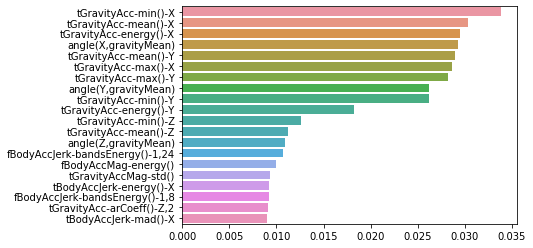

In [17]:
import seaborn as sns

importances_values = clf.feature_importances_
importances = pd.Series(importances_values, index=X_train.columns)
top20 = importances.sort_values(ascending=False)[:20]

sns.barplot(x=top20, y=top20.index)